In [1]:
1+1

2

In [1]:
import os
import numpy as np
import pandas as pd
from six.moves import cPickle
import PIL
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import multiprocessing
import random
import sklearn
from sklearn import metrics
import seaborn as sns
import cv2
import skimage
from skimage import restoration
import copy
import seaborn as sns

In [2]:
raw_RAD_id_list = os.listdir('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/')
print(len(raw_RAD_id_list))
RAD_id_list = raw_RAD_id_list

15000


In [3]:
RAD_id_submit_list = os.listdir("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2/")
print(len(RAD_id_submit_list))

8000


In [4]:
image_size = 64
nt = 4 # number of timesteps used for sequences in training
image_scalar = 80
vmin = -1
vmax = 0.6 * image_scalar
step_size = 5

In [5]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

color = [255, 255, 255]

In [7]:
for counter, RAD_id in enumerate(RAD_id_list[:50]):
    move_list = []
    temp_matrix_list = []
    print(RAD_id)
    for i in range(52, 55, 1):
#     for i in range(0, 60, 5):
#     for i in range(0, 5, 5):
        temp_matrix_old = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i + 0))).astype(np.uint8)
        temp_matrix_new = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i + step_size))).astype(np.uint8)
        temp_matrix_old = np.where(temp_matrix_old==255, 0, temp_matrix_old)
        temp_matrix_new = np.where(temp_matrix_new==255, 0, temp_matrix_new)
        temp_matrix_list.append(temp_matrix_new)
#         plt.imshow(temp_matrix_old, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
#         plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
        p0 = cv2.goodFeaturesToTrack(temp_matrix_old, mask = None, **feature_params)
        # Create a mask image for drawing purposes
        mask = np.zeros_like(temp_matrix_old)

        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(temp_matrix_old, temp_matrix_new, p0, None, **lk_params)

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        
        move = (good_new - good_old).mean(axis=0)
        move_list.append(move)
        
        # draw the tracks
        for j,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color, 2)
            img = copy.deepcopy(temp_matrix_new)
            img = cv2.circle(img,(a,b),3,color,-1)
        img = cv2.add(img,mask)
        
#         print(i, i+5)
#         print(move)
#         plt.imshow(img, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
#         H = np.float32([[1,0,move[0]], [0,1,move[1]]])
#         res = cv2.warpAffine(img, H, (501, 501))
#         plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
    move_list = np.array(move_list)
    move = move_list.mean(axis=0)
    for i in range(len(temp_matrix_list)):
        k = (len(temp_matrix_list) - 1 - i)
        H = np.float32([[1,0,k*move[0]], [0,1,k*move[1]]])
        temp_matrix_list[i] = cv2.warpAffine(temp_matrix_list[i], H, (501, 501))
        
    temp_matrix_list = np.array(temp_matrix_list)
    temp_matrix = temp_matrix_list.mean(axis=0)
    H = np.float32([[1,0,move[0]], [0,1,move[1]]])
    res = cv2.warpAffine(temp_matrix, H, (501, 501))
#     plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
#     plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()

RAD_436482474222544
RAD_326482464239548
RAD_426382464232542
RAD_256582464212538
RAD_416382474232536
RAD_446482464229537
RAD_206582464222546
RAD_466382464212541
RAD_496482474232542
RAD_336482464232533
RAD_466582464222547
RAD_336582474229546
RAD_496382464219531
RAD_486382464212548
RAD_256482474239552
RAD_376382464222540
RAD_296482464232543
RAD_296582474222537
RAD_346482464229534
RAD_446382464219545
RAD_386582474222532
RAD_236482464222542
RAD_306382464229539
RAD_236482464229542
RAD_426582474222545
RAD_426582474222551
RAD_356582464229531
RAD_486582464229549
RAD_266482464229547
RAD_476482474229534
RAD_486382464229548
RAD_436382474232551


/home/hadoop/.local/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice.
/home/hadoop/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


error: OpenCV(3.4.2) /io/opencv/modules/video/src/lkpyramid.cpp:1244: error: (-215:Assertion failed) (npoints = prevPtsMat.checkVector(2, 5, true)) >= 0 in function 'calc'


In [ ]:
p0 = [None]

In [ ]:
try:
    len(p0)
except:
    print('e')

In [ ]:
p0

In [160]:
def predict(RAD_id, path='/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train'):
    last = np.array(PIL.Image.open("%s/%s/%s_%03d.png" % (path, RAD_id, RAD_id, 30))).astype(np.uint8)
#     last = last + 1
#     last = last.astype(np.uint8)
    mean_list = []
    for i in range(31):
        temp = np.array(PIL.Image.open('%s/%s/%s_%03d.png' % (path, RAD_id, RAD_id, i))).astype(np.uint8)
        temp = np.where(temp==255, 0, temp)
        mean_list.append(temp.ravel().mean())
    mean_list = np.array(mean_list)
    if mean_list.mean() < 0.5:
        return [last] * 6
    
    move_list = []
    temp_matrix_list = []
#     print(RAD_id)
    for i in range(20, 26, 1):
#     for i in range(20, 26, 1):
#     for i in range(0, 60, 5):
#     for i in range(0, 5, 5):
        temp_matrix_old = np.array(PIL.Image.open("%s/%s/%s_%03d.png" % (path, RAD_id, RAD_id, i + 0))).astype(np.uint8)
        temp_matrix_new = np.array(PIL.Image.open("%s/%s/%s_%03d.png" % (path, RAD_id, RAD_id, i + step_size))).astype(np.uint8)
        temp_matrix_old = np.where(temp_matrix_old==255, 0, temp_matrix_old)
#         temp_matrix_old = temp_matrix_old + 1
#         temp_matrix_old = temp_matrix_old.astype(np.uint8)
        temp_matrix_new = np.where(temp_matrix_new==255, 0, temp_matrix_new)
#         temp_matrix_new = temp_matrix_new + 1
#         temp_matrix_new = temp_matrix_new.astype(np.uint8)
        temp_matrix_list.append(temp_matrix_new)
#         plt.imshow(temp_matrix_old, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
#         plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
        p0 = cv2.goodFeaturesToTrack(temp_matrix_old, mask = None, **feature_params)
        
        try:
            len(p0)
        except:
            return [last] * 6
        
        # Create a mask image for drawing purposes
        mask = np.zeros_like(temp_matrix_old)

        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(temp_matrix_old, temp_matrix_new, p0, None, **lk_params)

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        
        move = (good_new - good_old).mean(axis=0)
        move_list.append(move)
        
#         # draw the tracks
#         for j,(new,old) in enumerate(zip(good_new,good_old)):
#             a,b = new.ravel()
#             c,d = old.ravel()
#             mask = cv2.line(mask, (a,b),(c,d), color, 2)
#             img = copy.deepcopy(temp_matrix_new)
#             img = cv2.circle(img,(a,b),3,color,-1)
#         img = cv2.add(img,mask)
        
#         print(i, i+step_size)
#         print(move)
#         plt.imshow(img, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
#         H = np.float32([[1,0,move[0]], [0,1,move[1]]])
#         res = cv2.warpAffine(img, H, (501, 501))
#         plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
    move_list = np.array(move_list)
    move = move_list.mean(axis=0)
    for i in range(len(temp_matrix_list)):
        k = (len(temp_matrix_list) - 1 - i)
        H = np.float32([[1,0,k*move[0]], [0,1,k*move[1]]])
        temp_matrix_list[i] = cv2.warpAffine(temp_matrix_list[i], H, (501, 501))
        
    temp_matrix_list = np.array(temp_matrix_list)
    temp_matrix = temp_matrix_list.mean(axis=0)
    H = np.float32([[1,0,move[0]], [0,1,move[1]]])
    res = cv2.warpAffine(temp_matrix, H, (501, 501))
#     plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
#     plt.imshow(last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
    
    ans_list = []
    last = np.where(last==255, 0, last)
    for i in range(1, 7):
        k = i * 1
        H = np.float32([[1,0,k*move[0]], [0,1,k*move[1]]])
        res = cv2.warpAffine(last, H, (501, 501))
        res = np.where(res==0, 255, res)
        ans_list.append(res)
    return ans_list

In [161]:
start_time = time.time()
print(time.strftime("start time: %Y-%m-%d %H:%M:%S", time.localtime()))
model_abs_loss = []
model_sqr_loss = []
last_frame_abs_loss = []
last_frame_sqr_loss = []
for RAD_id_counter, RAD_id in enumerate(RAD_id_list[:100]):
    x_last = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 30))).astype(np.uint8)
#     x_last = np.where(x_last==255, -1, x_last)
#     x_last = x_last + 1
#     x_last = x_last.astype(np.uint8)
    y_true_last = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 60))).astype(np.uint8)
#     y_true_last = np.where(y_true_last==255, -1, y_true_last)
#     y_true_last = y_true_last + 1
#     y_true_last = y_true_last.astype(np.uint8)
    y_pred_last = predict(RAD_id)[-1]
#     plt.imshow(x_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
#     plt.imshow(y_pred_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
    x_last = np.where(x_last==255, 0, x_last)
    y_true_last = np.where(y_true_last==255, 0, y_true_last)
    y_pred_last = np.where(y_pred_last==255, 0, y_pred_last)
    last_frame_abs_loss.append(sklearn.metrics.mean_absolute_error(y_true_last.astype(np.int), x_last.astype(np.int)))
    model_abs_loss.append(sklearn.metrics.mean_absolute_error(y_true_last.astype(np.int), y_pred_last.astype(np.int)))
    last_frame_sqr_loss.append(sklearn.metrics.mean_squared_error(y_true_last.astype(np.int), x_last.astype(np.int)))
    model_sqr_loss.append(sklearn.metrics.mean_squared_error(y_true_last.astype(np.int), y_pred_last.astype(np.int)))
    if RAD_id_counter % 10 == 0:
        print('RAD_id_counter=%5d\t\tIt takes %.2f' % (RAD_id_counter, time.time() - start_time))
model_abs_loss = np.array(model_abs_loss)
last_frame_abs_loss = np.array(last_frame_abs_loss)
model_sqr_loss = np.array(model_sqr_loss)
last_frame_sqr_loss = np.array(last_frame_sqr_loss)
print('     model_abs_loss=%.7f' % model_abs_loss.mean())
print('last_frame_abs_loss=%.7f' % last_frame_abs_loss.mean())
print('     model_sqr_loss=%.7f' % model_sqr_loss.mean())
print('last_frame_sqr_loss=%.7f' % last_frame_sqr_loss.mean())
print(time.strftime('It took  %H:%M:%S', time.gmtime(time.time() - start_time)))
print(time.strftime("end time: %Y-%m-%d %H:%M:%S", time.localtime()))

start time: 2018-10-09 22:06:22
RAD_id_counter=    0		It takes 0.12
RAD_id_counter=   10		It takes 0.68
RAD_id_counter=   20		It takes 1.38
RAD_id_counter=   30		It takes 2.18
RAD_id_counter=   40		It takes 2.88
RAD_id_counter=   50		It takes 3.58
RAD_id_counter=   60		It takes 4.25
RAD_id_counter=   70		It takes 5.13
RAD_id_counter=   80		It takes 5.78
RAD_id_counter=   90		It takes 6.69
     model_abs_loss=1.8744206
last_frame_abs_loss=1.9779436
     model_sqr_loss=38.1972909
last_frame_sqr_loss=40.9361165
It took  00:00:07
end time: 2018-10-09 22:06:29


In [134]:
y_true_last#.astype(np.int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [135]:
y_pred_last#.astype(np.int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

     model_abs_loss=1.8744206
last_frame_abs_loss=1.9779436
     model_sqr_loss=38.1972909
last_frame_sqr_loss=40.9361165


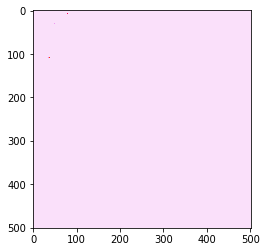

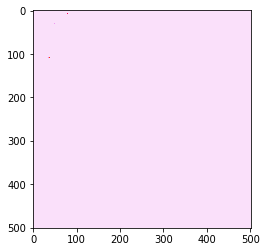

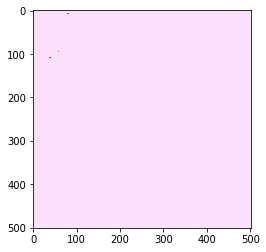

In [138]:
print('     model_abs_loss=%.7f' % model_abs_loss.mean())
print('last_frame_abs_loss=%.7f' % last_frame_abs_loss.mean())
print('     model_sqr_loss=%.7f' % model_sqr_loss.mean())
print('last_frame_sqr_loss=%.7f' % last_frame_sqr_loss.mean())

plt.imshow(x_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

plt.imshow(y_pred_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

plt.imshow(y_true_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

In [184]:
version = 'SRAD2018_Neutrino_Optical_Flow_v0.2.4.1_18.10.09.22.06'

In [186]:
print('version=%s' % version)
start_time = time.time()
print(time.strftime("start time: %Y-%m-%d %H:%M:%S", time.localtime()))
for RAD_id_counter, RAD_id in enumerate(RAD_id_submit_list):
    if not os.path.exists("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_submit/%s/%s" % (version, RAD_id)):
        os.makedirs("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_submit/%s/%s" % (version, RAD_id))
    result_list = predict(RAD_id, path='/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2')
    for i in range(6):
        result = result_list[i]
        result = result.astype(np.uint8)
        result = np.where(result==0, 255, result)
        result = PIL.Image.fromarray(result)
        result.save("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_submit/%s/%s/%s_f%03d.png" % (version, RAD_id, RAD_id, i + 1))
    if RAD_id_counter % 10 == 0:
        print('RAD_id_counter=%5d\t\tIt takes %.2f' % (RAD_id_counter, time.time() - start_time))
print(time.strftime('It took  %H:%M:%S', time.gmtime(time.time() - start_time)))
print(time.strftime("end time: %Y-%m-%d %H:%M:%S", time.localtime()))

version=SRAD2018_Neutrino_Optical_Flow_v0.2.4.1_18.10.09.22.06
start time: 2018-10-09 22:10:26
RAD_id_counter=    0		It takes 0.04
RAD_id_counter=   10		It takes 0.74
RAD_id_counter=   20		It takes 2.08
RAD_id_counter=   30		It takes 3.01
RAD_id_counter=   40		It takes 3.81
RAD_id_counter=   50		It takes 4.50
RAD_id_counter=   60		It takes 5.51
RAD_id_counter=   70		It takes 6.44
RAD_id_counter=   80		It takes 7.11
RAD_id_counter=   90		It takes 7.80
RAD_id_counter=  100		It takes 8.54
RAD_id_counter=  110		It takes 9.34
RAD_id_counter=  120		It takes 10.29
RAD_id_counter=  130		It takes 11.00
RAD_id_counter=  140		It takes 12.12
RAD_id_counter=  150		It takes 12.89
RAD_id_counter=  160		It takes 14.18
RAD_id_counter=  170		It takes 15.06
RAD_id_counter=  180		It takes 16.01
RAD_id_counter=  190		It takes 17.02
RAD_id_counter=  200		It takes 17.91
RAD_id_counter=  210		It takes 18.72
RAD_id_counter=  220		It takes 19.55
RAD_id_counter=  230		It takes 20.34
RAD_id_counter=  240		It take

/home/hadoop/.local/lib/python3.5/site-packages/ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice.
/home/hadoop/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


RAD_id_counter= 1780		It takes 163.06
RAD_id_counter= 1790		It takes 164.17
RAD_id_counter= 1800		It takes 165.08
RAD_id_counter= 1810		It takes 166.11
RAD_id_counter= 1820		It takes 166.95
RAD_id_counter= 1830		It takes 168.15
RAD_id_counter= 1840		It takes 169.03
RAD_id_counter= 1850		It takes 169.92
RAD_id_counter= 1860		It takes 170.74
RAD_id_counter= 1870		It takes 171.74
RAD_id_counter= 1880		It takes 172.75
RAD_id_counter= 1890		It takes 173.50
RAD_id_counter= 1900		It takes 174.55
RAD_id_counter= 1910		It takes 175.31
RAD_id_counter= 1920		It takes 176.26
RAD_id_counter= 1930		It takes 177.18
RAD_id_counter= 1940		It takes 177.85
RAD_id_counter= 1950		It takes 178.57
RAD_id_counter= 1960		It takes 179.67
RAD_id_counter= 1970		It takes 180.67
RAD_id_counter= 1980		It takes 181.61
RAD_id_counter= 1990		It takes 182.48
RAD_id_counter= 2000		It takes 183.30
RAD_id_counter= 2010		It takes 184.06
RAD_id_counter= 2020		It takes 185.00
RAD_id_counter= 2030		It takes 185.92
RAD_id_count

RAD_id_counter= 3940		It takes 358.14
RAD_id_counter= 3950		It takes 359.05
RAD_id_counter= 3960		It takes 360.25
RAD_id_counter= 3970		It takes 361.09
RAD_id_counter= 3980		It takes 362.00
RAD_id_counter= 3990		It takes 363.14
RAD_id_counter= 4000		It takes 364.01
RAD_id_counter= 4010		It takes 364.97
RAD_id_counter= 4020		It takes 365.74
RAD_id_counter= 4030		It takes 366.58
RAD_id_counter= 4040		It takes 367.39
RAD_id_counter= 4050		It takes 368.29
RAD_id_counter= 4060		It takes 369.10
RAD_id_counter= 4070		It takes 370.03
RAD_id_counter= 4080		It takes 371.00
RAD_id_counter= 4090		It takes 371.91
RAD_id_counter= 4100		It takes 372.72
RAD_id_counter= 4110		It takes 373.57
RAD_id_counter= 4120		It takes 374.47
RAD_id_counter= 4130		It takes 375.77
RAD_id_counter= 4140		It takes 376.74
RAD_id_counter= 4150		It takes 377.94
RAD_id_counter= 4160		It takes 378.65
RAD_id_counter= 4170		It takes 379.72
RAD_id_counter= 4180		It takes 380.27
RAD_id_counter= 4190		It takes 381.21
RAD_id_count

RAD_id_counter= 6100		It takes 558.09
RAD_id_counter= 6110		It takes 558.87
RAD_id_counter= 6120		It takes 560.08
RAD_id_counter= 6130		It takes 560.96
RAD_id_counter= 6140		It takes 561.96
RAD_id_counter= 6150		It takes 563.03
RAD_id_counter= 6160		It takes 563.71
RAD_id_counter= 6170		It takes 564.35
RAD_id_counter= 6180		It takes 565.30
RAD_id_counter= 6190		It takes 566.34
RAD_id_counter= 6200		It takes 567.20
RAD_id_counter= 6210		It takes 568.04
RAD_id_counter= 6220		It takes 569.08
RAD_id_counter= 6230		It takes 569.86
RAD_id_counter= 6240		It takes 570.93
RAD_id_counter= 6250		It takes 572.02
RAD_id_counter= 6260		It takes 573.00
RAD_id_counter= 6270		It takes 573.86
RAD_id_counter= 6280		It takes 574.76
RAD_id_counter= 6290		It takes 575.56
RAD_id_counter= 6300		It takes 576.55
RAD_id_counter= 6310		It takes 577.55
RAD_id_counter= 6320		It takes 578.20
RAD_id_counter= 6330		It takes 579.09
RAD_id_counter= 6340		It takes 580.11
RAD_id_counter= 6350		It takes 580.78
RAD_id_count

In [171]:
result_list[i]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0]], dtype=uint8)

In [172]:
result_list[i][160:170,230:240]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255,   0,   0,   0,   0,   0,   0]], dtype=uint8)

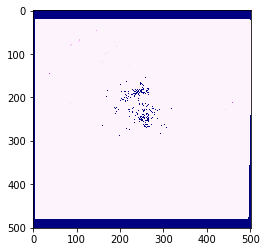

In [173]:

plt.imshow(result_list[i], cmap=cm.gist_ncar_r, vmin=-1, vmax=255)
plt.show()

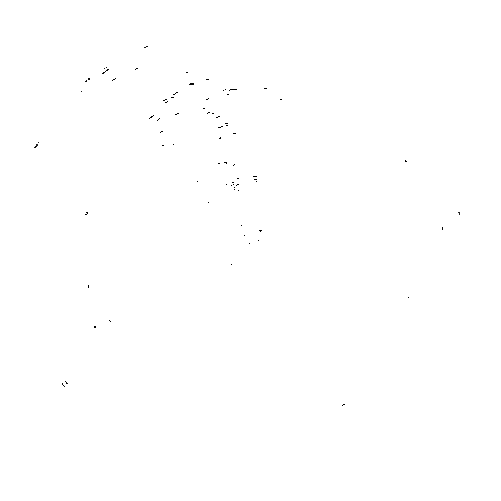

In [174]:
result

In [ ]:
for RAD_id_counter, RAD_id in enumerate(RAD_id_submit_list[1775:1777]):
    result_list = predict(RAD_id, path='/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2')
    print(RAD_id)
    plt.imshow(result_list[-1], cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
    plt.show()

```bash
zip -r "SRAD2018_Neutrino_Optical_Flow_v0.2.4.1_18.10.09.22.06.zip" "SRAD2018_Neutrino_Optical_Flow_v0.2.4.1_18.10.09.22.06"
ls | wc -l
scp -P 50000 hadoop@222.200.177.32:~/Documents/Neutrino/SRAD2018/SRAD2018_submit/SRAD2018_Neutrino_Optical_Flow_v0.2.4.1_18.10.09.22.06.zip C:/SRAD2018/
```

# Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html
- https://blog.csdn.net/on2way/article/details/46801063

In [145]:
old_version = 'SRAD2018_Neutrino_Optical_Flow_v0.2.3.1_18.10.09.00.47'

In [176]:
counter = 1
a = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2/%s/%s_%03d.png" % (RAD_id_submit_list[counter], RAD_id_submit_list[counter], 30))).astype(np.float)
b = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_submit/%s/%s/%s_f%03d.png" % (version, RAD_id_submit_list[counter], RAD_id_submit_list[counter], 1))).astype(np.float)

In [177]:
sklearn.metrics.mean_squared_error(a, b)

58430.04051776684

In [178]:
sklearn.metrics.mean_absolute_error(a, b)

229.13741379516415

In [179]:
a

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255.,   0.]])

In [180]:
b

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [181]:
a[160:170,230:240]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [182]:
b[160:170,230:240]

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255.,   2., 255., 255., 255., 255., 255.],
       [255., 255., 255.,   2., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.]])

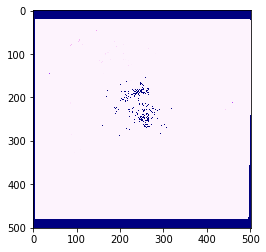

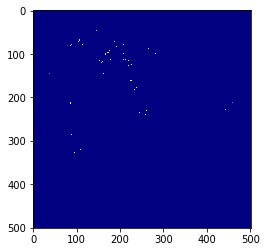

In [183]:
plt.imshow(a, cmap=cm.gist_ncar_r, vmin=-1, vmax=255)
plt.show()
plt.imshow(b, cmap=cm.gist_ncar_r, vmin=-1, vmax=255)
plt.show()

In [154]:
c = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2/%s/%s_%03d.png" % (RAD_id_submit_list[counter], RAD_id_submit_list[counter], 30))).astype(np.uint8)

In [86]:
c

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0]], dtype=uint8)

In [87]:
c = np.where(c==255,-1,c)

In [88]:
c

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1,  0]], dtype=int16)